In [1]:
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

In [2]:
# OBS
path = '/home/jcharrel/Documents/stage_M2/data/CALIPSO/'
ncfile_obs=path+"CALIPSO_3DCloudFraction_climato_concatenated_averaged_2008_2021_not_2016_r144x90.nc"
nc_obs = netCDF4.Dataset(ncfile_obs)

ncfile_alt_mid=path+"CALIPSO_3DCloudFraction_alt_mid.nc"
nc_alt_mid = netCDF4.Dataset(ncfile_alt_mid)

In [3]:
# LMDZ6A
path = '/home/jcharrel/Documents/stage_M2/data/LMDZ6A/'
ncfile_lmdz6a=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmthCOSP_3Dclcalipso_nan_r144x90.nc"
nc_lmdz6a = netCDF4.Dataset(ncfile_lmdz6a)

#ncfile_alt_mid=path+"CALIPSO_3DCloudFraction_alt_mid.nc"
#nc_alt_mid = netCDF4.Dataset(ncfile_alt_mid)

In [4]:
# MASK
path = '/home/jcharrel/Documents/stage_M2/data/LMDZ6A/'
ncfile_mask=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmth_phis_r144x90.nc"
nc_mask = netCDF4.Dataset(ncfile_mask)

In [5]:
# GRID
lon = nc_obs.variables['lon'][:]
lat = nc_obs.variables['lat'][:]

lon_lmdz6a = nc_lmdz6a.variables['lon'][:]
lat_lmdz6a = nc_lmdz6a.variables['lat'][:]

alt_mid = nc_alt_mid.variables['alt_mid'][:]
lat_id = (lat <= -60) 
lat = lat[lat_id]

import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

In [6]:
# VARIABLES - OBS
clobs = nc_obs.variables['clcalipso'][0,:,lat_id,:]
clobs[clobs<0] = np.nan
#clcobs = nc_obs.variables['clrcalipso'][0,:,lat_id,:]
#clunobs = nc_obs.variables['uncalipso'][0,:,lat_id,:]
clobs = np.dstack((clobs))

# VARIABLES - LMDZ6A
cllmdz6a = nc_lmdz6a.variables['clcalipso'][:,:,lat_id,:]
cllmdz6a = np.nanmean(cllmdz6a, axis=0)
cllmdz6a = np.dstack((cllmdz6a))

# ALTITUDE
g = 9.81 # m/s
alt = nc_mask.variables['phis'][0,lat_id,:]/g #m

In [7]:
print('Limite basse :', nc_obs.variables['alt_bound'][0])
print('Limite haute :', nc_obs.variables['alt_bound'][1])

Limite basse : [ 0.    0.48  0.96  1.44  1.92  2.4   2.88  3.36  3.84  4.32  4.8   5.28
  5.76  6.24  6.72  7.2   7.68  8.16  8.64  9.12  9.6  10.08 10.56 11.04
 11.52 12.   12.48 12.96 13.44 13.92 14.4  14.88 15.36 15.84 16.32 16.8
 17.28 17.76 18.24 18.72]
Limite haute : [ 0.48  0.96  1.44  1.92  2.4   2.88  3.36  3.84  4.32  4.8   5.28  5.76
  6.24  6.72  7.2   7.68  8.16  8.64  9.12  9.6  10.08 10.56 11.04 11.52
 12.   12.48 12.96 13.44 13.92 14.4  14.88 15.36 15.84 16.32 16.8  17.28
 17.76 18.24 18.72 19.2 ]


In [8]:
alt_mid = [0.24, 0.72, 1.2, 1.68, 2.16, 2.64, 3.12, 3.6, 4.08, 4.56, 5.04,
    5.52, 6, 6.48, 6.96, 7.44, 7.92, 8.4, 8.88, 9.360001, 9.84, 10.32, 10.8,
    11.28, 11.76, 12.24, 12.72, 13.2, 13.68, 14.16, 14.64, 15.12, 15.6,
    16.08, 16.56, 17.04, 17.52, 18, 18.48, 18.96]
alt_lmdz6a = nc_lmdz6a.variables['height'][:]

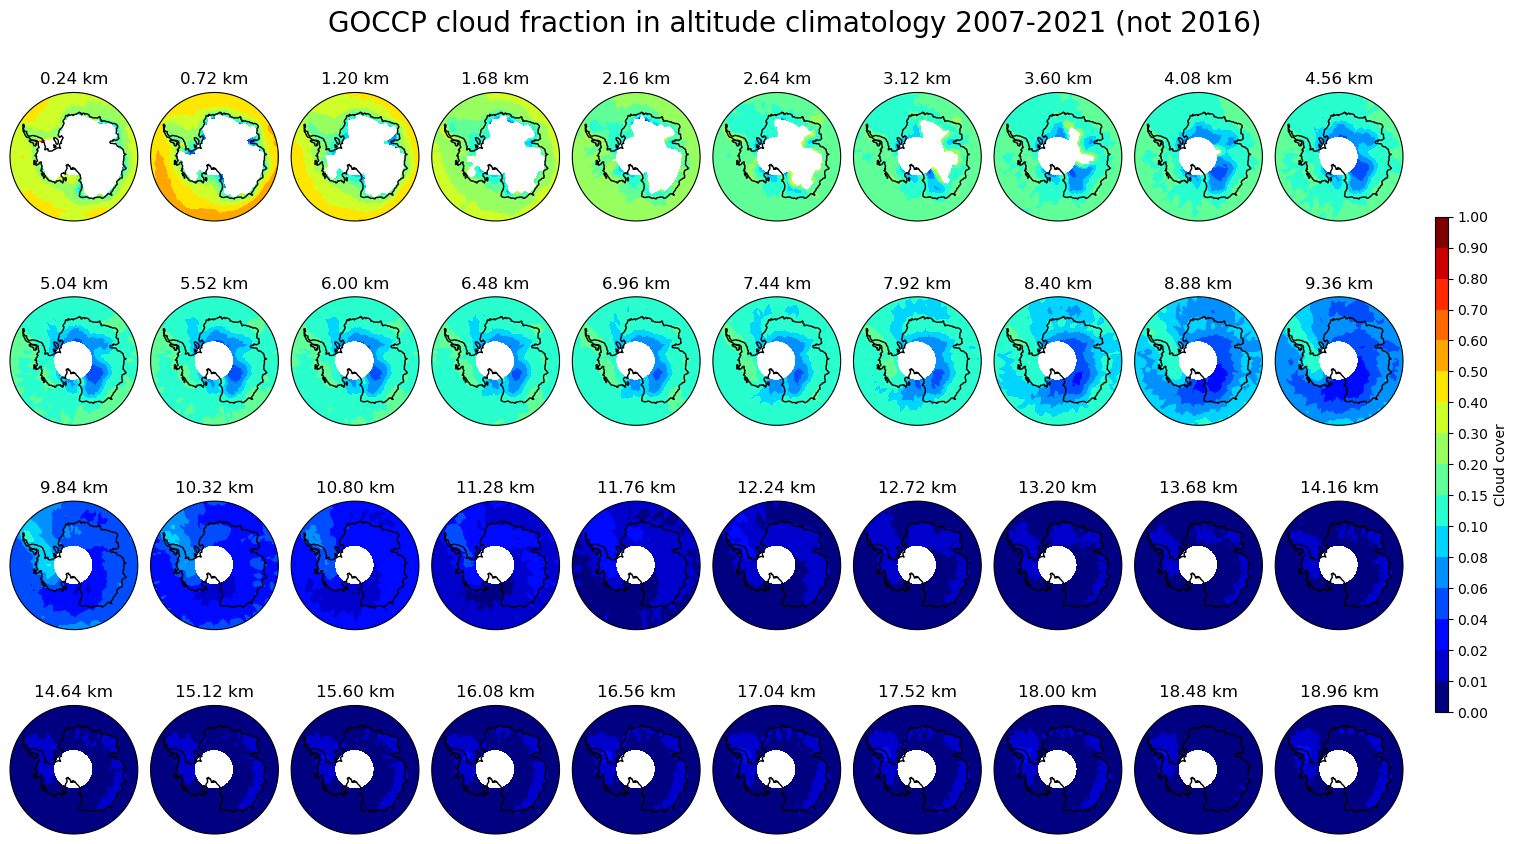

In [9]:
fig, axes = plt.subplots(figsize=(16,9), nrows=4, ncols=10, subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=0)})
clevs = np.array([0,1,2,4,6,8,10,15,20,30,40,50,60,70,80,90,100])*1e-2
pltcounter = 0

for plotid in axes.flat:
    pltcounter = pltcounter + 1
    clplot = clobs[:,:,pltcounter-1]
    clplt, lonplt = add_cyclic_point(clplot, coord=lon) # filling the gap at longitude 0

    plotid.set_extent([-180, 180, np.min(lat), np.max(lat)], ccrs.PlateCarree())
    plotid.set_boundary(map_circle, transform=plotid.transAxes)
    

    cs = plotid.contourf(lonplt, lat, clplt, clevs, transform=ccrs.PlateCarree(),  
                         norm = mpl.colors.BoundaryNorm(boundaries=clevs, ncolors=256), 
                         cmap='jet')
    
    plotid.coastlines(resolution="110m",linewidth=1)
    #alt_contours = plotid.contour(lon, lat, alt, colors='black', linestyles=':', levels=[1000,2000,3000,4000], linewidths=0.5,  transform=ccrs.PlateCarree())
    #plotid.clabel(alt_contours, inline=True, fontsize=8, fmt='%1.0f m')
    
    # Dumont d'Urville
    #plotid.text(140, -65, 'DDU', transform=ccrs.PlateCarree(), fontsize=10, color='black')
    #plotid.scatter(140, -66, marker='.', s=20, color='k', transform=ccrs.PlateCarree())
    # Concordia
    #plotid.text(125, -74, 'DC', transform=ccrs.PlateCarree(), fontsize=10, color='black')
    #plotid.scatter(123, -75, marker='.', s=20, color='k', transform=ccrs.PlateCarree())
    plotid.set_title('{:.2f} km'.format(alt_mid[pltcounter-1]))
    
fig.suptitle('GOCCP cloud fraction in altitude climatology 2007-2021 (not 2016)', fontsize=20)

fig.tight_layout()
fig.subplots_adjust(right=0.88, wspace=0.1)
cbar_ax = fig.add_axes([0.90, 0.2, 0.008, 0.55])
fig.colorbar(cs, cax=cbar_ax, ticks=clevs, label='Cloud cover')
path_fig = '/home/jcharrel/Documents/stage_M2/figures/CALIPSO_climato/'
plt.savefig(path_fig+'3DCloudFraction_climato_antarctica_obs.png',dpi=300)

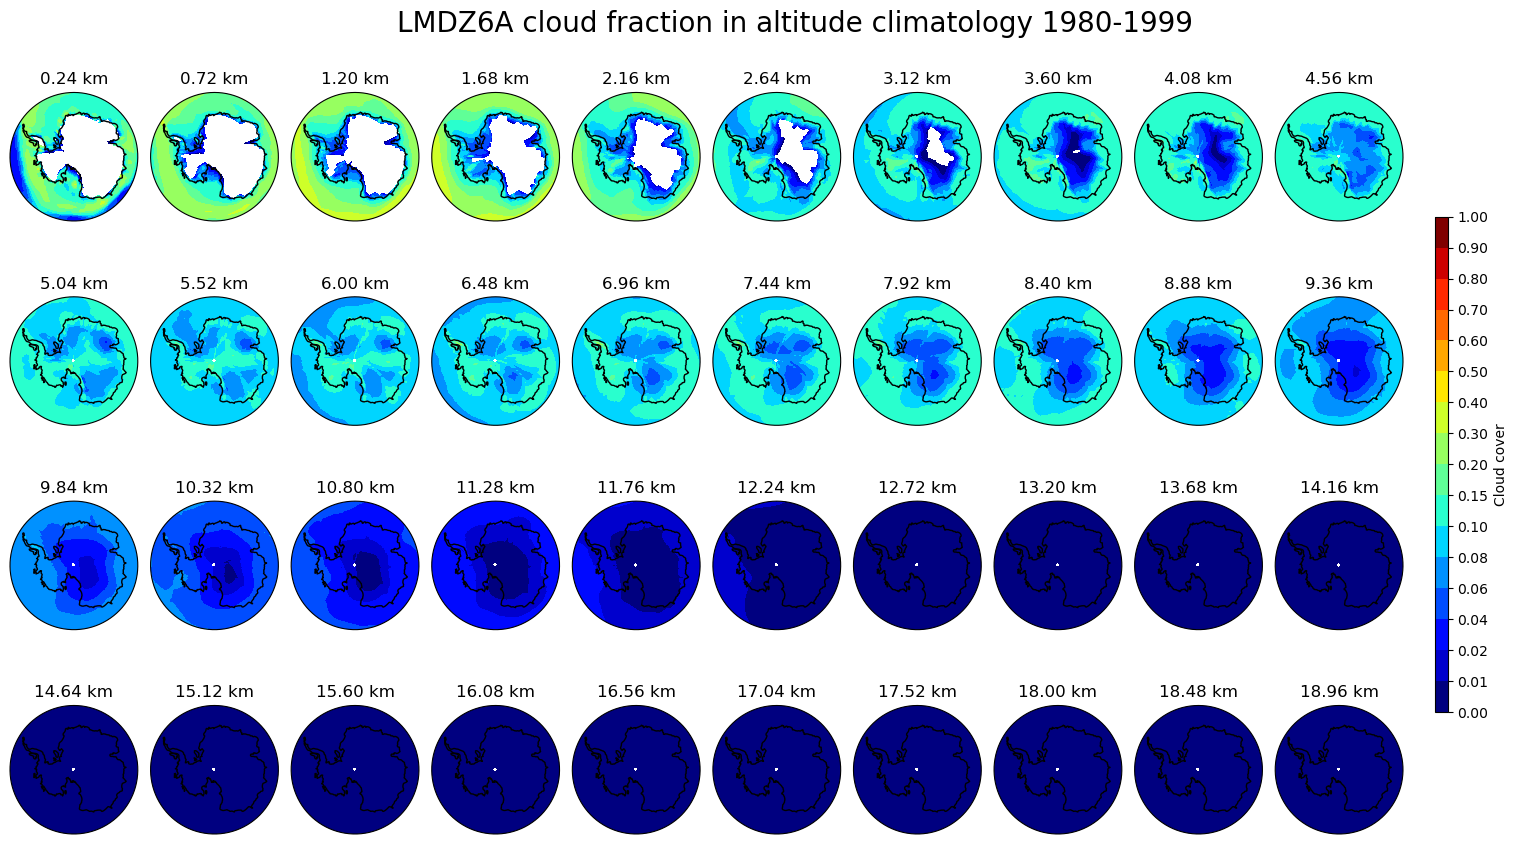

In [10]:
fig, axes = plt.subplots(figsize=(16,9), nrows=4, ncols=10, subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=0)})
clevs = np.array([0,1,2,4,6,8,10,15,20,30,40,50,60,70,80,90,100])*1e-2
pltcounter = 0

for plotid in axes.flat:
    pltcounter = pltcounter + 1
    clplot = cllmdz6a[:,:,pltcounter-1]
    clplt, lonplt = add_cyclic_point(clplot, coord=lon) # filling the gap at longitude 0

    plotid.set_extent([-180, 180, np.min(lat), np.max(lat)], ccrs.PlateCarree())
    plotid.set_boundary(map_circle, transform=plotid.transAxes)
    

    cs = plotid.contourf(lonplt, lat, clplt, clevs, transform=ccrs.PlateCarree(),  
                         norm = mpl.colors.BoundaryNorm(boundaries=clevs, ncolors=256), 
                         cmap='jet')
    
    plotid.coastlines(resolution="110m",linewidth=1)
    #alt_contours = plotid.contour(lon, lat, alt, colors='black', linestyles=':', levels=[1000,2000,3000,4000], linewidths=0.5,  transform=ccrs.PlateCarree())
    #plotid.clabel(alt_contours, inline=True, fontsize=8, fmt='%1.0f m')
    
    # Dumont d'Urville
    #plotid.text(140, -65, 'DDU', transform=ccrs.PlateCarree(), fontsize=10, color='black')
    #plotid.scatter(140, -66, marker='.', s=20, color='k', transform=ccrs.PlateCarree())
    # Concordia
    #plotid.text(125, -74, 'DC', transform=ccrs.PlateCarree(), fontsize=10, color='black')
    #plotid.scatter(123, -75, marker='.', s=20, color='k', transform=ccrs.PlateCarree())
    plotid.set_title('{:.2f} km'.format(alt_lmdz6a[pltcounter-1]/1000))
    
fig.suptitle('LMDZ6A cloud fraction in altitude climatology 1980-1999', fontsize=20)

fig.tight_layout()
fig.subplots_adjust(right=0.88, wspace=0.1)
cbar_ax = fig.add_axes([0.90, 0.2, 0.008, 0.55])
fig.colorbar(cs, cax=cbar_ax, ticks=clevs, label='Cloud cover')
path_fig = '/home/jcharrel/Documents/stage_M2/figures/CALIPSO_climato/'
plt.savefig(path_fig+'3DCloudFraction_climato_antarctica_lmdz6a.png',dpi=300)

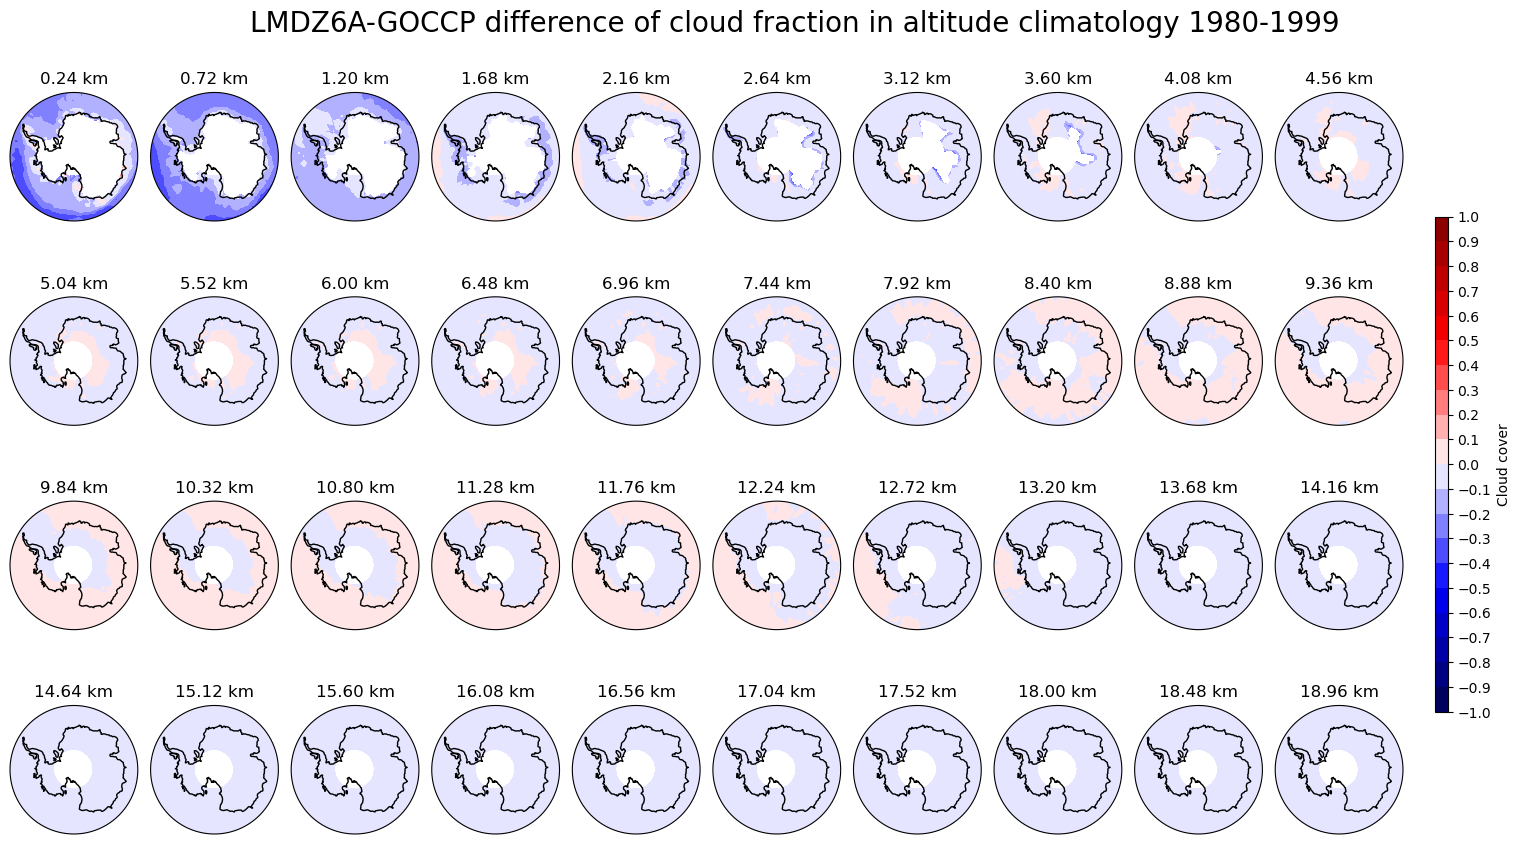

In [11]:
fig, axes = plt.subplots(figsize=(16,9), nrows=4, ncols=10, subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=0)})
clevs = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
#clevs = np.array([-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3])
pltcounter = 0

for plotid in axes.flat:
    pltcounter = pltcounter + 1
    clplot = cllmdz6a[:,:,pltcounter-1]-clobs[:,:,pltcounter-1]
    clplt, lonplt = add_cyclic_point(clplot, coord=lon) # filling the gap at longitude 0

    plotid.set_extent([-180, 180, np.min(lat), np.max(lat)], ccrs.PlateCarree())
    plotid.set_boundary(map_circle, transform=plotid.transAxes)
    
    cs = plotid.contourf(lonplt, lat, clplt, clevs, transform=ccrs.PlateCarree(), 
                         cmap='seismic')
    
    plotid.coastlines(resolution="110m",linewidth=1)
    #alt_contours = plotid.contour(lon, lat, alt, colors='black', linestyles=':', levels=[1000,2000,3000,4000], linewidths=0.5,  transform=ccrs.PlateCarree())
    #plotid.clabel(alt_contours, inline=True, fontsize=8, fmt='%1.0f m')
    
    # Dumont d'Urville
    #plotid.text(140, -65, 'DDU', transform=ccrs.PlateCarree(), fontsize=10, color='black')
    #plotid.scatter(140, -66, marker='.', s=20, color='k', transform=ccrs.PlateCarree())
    # Concordia
    #plotid.text(125, -74, 'DC', transform=ccrs.PlateCarree(), fontsize=10, color='black')
    #plotid.scatter(123, -75, marker='.', s=20, color='k', transform=ccrs.PlateCarree())
    plotid.set_title('{:.2f} km'.format(alt_lmdz6a[pltcounter-1]/1000))
    
fig.suptitle('LMDZ6A-GOCCP difference of cloud fraction in altitude climatology 1980-1999', fontsize=20)

fig.tight_layout()
fig.subplots_adjust(right=0.88, wspace=0.1)
cbar_ax = fig.add_axes([0.90, 0.2, 0.008, 0.55])
fig.colorbar(cs, cax=cbar_ax, ticks=clevs, label='Cloud cover')
path_fig = '/home/jcharrel/Documents/stage_M2/figures/CALIPSO_climato/'
plt.savefig(path_fig+'3DCloudFraction_climato_antarctica_diff.png',dpi=300)